In [1]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.initializers import GlorotUniform, GlorotNormal
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [19]:
from pathlib import Path
from io import StringIO
import os


In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
baseDir = '/content/drive/MyDrive/PADP/StatisticallearningII/Proyecto final/'

In [5]:
data = pd.read_csv(baseDir+'./CXR8/BBox_List_2017.csv')
data.head()

,Image Index,Finding Label,Bbox [x,y,w,h],Unnamed: 6,Unnamed: 7,Unnamed: 8
0,00013118_008.png,Atelectasis,225.084746,547.019217,86.779661,79.186441,NaN,NaN,NaN
1,00014716_007.png,Atelectasis,686.101695,131.543498,185.491525,313.491525,NaN,NaN,NaN
2,00029817_009.png,Atelectasis,221.830508,317.053115,155.118644,216.949153,NaN,NaN,NaN
3,00014687_001.png,Atelectasis,726.237288,494.951420,141.016949,55.322034,NaN,NaN,NaN
4,00017877_001.png,Atelectasis,660.067797,569.780787,200.677966,78.101695,NaN,NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Image Index    984 non-null    object 
 1   Finding Label  984 non-null    object 
 2   Bbox [x        984 non-null    float64
 3   y              984 non-null    float64
 4   w              984 non-null    float64
 5   h]             984 non-null    float64
 6   Unnamed: 6     0 non-null      float64
 7   Unnamed: 7     0 non-null      float64
 8   Unnamed: 8     0 non-null      float64
dtypes: float64(7), object(2)
memory usage: 69.3+ KB


In [7]:
data['Finding Label'].value_counts()



Atelectasis     180
Effusion        153
Cardiomegaly    146
Infiltrate      123
Pneumonia       120
Pneumothorax     98
Mass             85
Nodule           79
Name: Finding Label, dtype: int64

In [8]:
dataV2120 = pd.read_csv(baseDir+'./CXR8/Data_Entry_2017_v2020.csv')
dataV2120.head()
dataV2120.shape

(112120, 11)

In [9]:
dataV2120['Finding Labels'].value_counts().head(50)


No Finding                             60361
Infiltration                            9547
Atelectasis                             4215
Effusion                                3955
Nodule                                  2705
Pneumothorax                            2194
Mass                                    2139
Effusion|Infiltration                   1603
Atelectasis|Infiltration                1350
Consolidation                           1310
Atelectasis|Effusion                    1165
Pleural_Thickening                      1126
Cardiomegaly                            1093
Emphysema                                892
Infiltration|Nodule                      829
Atelectasis|Effusion|Infiltration        737
Fibrosis                                 727
Edema                                    628
Cardiomegaly|Effusion                    484
Consolidation|Infiltration               441
Infiltration|Mass                        420
Effusion|Pneumothorax                    403
Effusion|M

In [10]:
dataNew = dataV2120
dataNew['Finding Labels'] = dataNew['Finding Labels'].apply(lambda x: x.split('|')[0])


In [11]:
dataNew['Finding Labels'].value_counts().head(50)


No Finding            60361
Infiltration          11795
Atelectasis           11545
Effusion               8040
Consolidation          3331
Nodule                 3009
Mass                   2926
Cardiomegaly           2404
Pneumothorax           2200
Edema                  1862
Emphysema              1734
Pleural_Thickening     1217
Fibrosis               1215
Pneumonia               325
Hernia                  156
Name: Finding Labels, dtype: int64

In [12]:
dataNew.head(20)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
0,00000001_000.png,Cardiomegaly,0,1,57,M,PA,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly,1,1,58,M,PA,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly,2,1,58,M,PA,2500,2048,0.168,0.168
3,00000002_000.png,No Finding,0,2,80,M,PA,2500,2048,0.171,0.171
4,00000003_001.png,Hernia,0,3,74,F,PA,2500,2048,0.168,0.168
5,00000003_002.png,Hernia,1,3,75,F,PA,2048,2500,0.168,0.168
6,00000003_003.png,Hernia,2,3,76,F,PA,2698,2991,0.143,0.143
7,00000003_004.png,Hernia,3,3,77,F,PA,2500,2048,0.168,0.168
8,00000003_005.png,Hernia,4,3,78,F,PA,2686,2991,0.143,0.143
9,00000003_006.png,Hernia,5,3,79,F,PA,2992,2991,0.143,0.143


In [ ]:
file1 = open(baseDir+'./CXR8/train_val_list.txt', 'r')
Lines = file1.readlines()
file2 = open(baseDir+'./CXR8/test_list.txt', 'r')
Lines2 = file1.readlines()
train_val_list = pd.read_csv(StringIO("\n".join(Lines)),sep="\n")
train_val_list.head()
test_list = pd.read_csv(StringIO("\n".join(Lines)),sep="\n")
test_list.head()

,00000001_000.png
0,00000001_001.png
1,00000001_002.png
2,00000002_000.png
3,00000004_000.png
4,00000005_000.png


In [13]:
#!wget https://nihcc.box.com/shared/static/vfk49d74nhbxq3nqjg0900w5nvkorp5c.gz


In [14]:
#!tar -xvxf vfk49d74nhbxq3nqjg0900w5nvkorp5c.gz -C '/content/drive/MyDrive/PADP/StatisticallearningII/Proyecto final/CXR8/images/'

In [ ]:
import urllib.request
imgDir = '/content/drive/MyDrive/PADP/StatisticallearningII/Proyecto final/CXR8/images/'
# URLs for the zip files
links = [
    'https://nihcc.box.com/shared/static/vfk49d74nhbxq3nqjg0900w5nvkorp5c.gz',
    'https://nihcc.box.com/shared/static/i28rlmbvmfjbl8p2n3ril0pptcmcu9d1.gz',
    'https://nihcc.box.com/shared/static/f1t00wrtdk94satdfb9olcolqx20z2jp.gz',
	'https://nihcc.box.com/shared/static/0aowwzs5lhjrceb3qp67ahp0rd1l1etg.gz',
    'https://nihcc.box.com/shared/static/v5e3goj22zr6h8tzualxfsqlqaygfbsn.gz',
	'https://nihcc.box.com/shared/static/asi7ikud9jwnkrnkj99jnpfkjdes7l6l.gz',
	'https://nihcc.box.com/shared/static/jn1b4mw4n6lnh74ovmcjb8y48h8xj07n.gz',
    'https://nihcc.box.com/shared/static/tvpxmn7qyrgl0w8wfh9kqfjskv6nmm1j.gz',
	'https://nihcc.box.com/shared/static/upyy3ml7qdumlgk2rfcvlb9k6gvqq2pj.gz',
	'https://nihcc.box.com/shared/static/l6nilvfa9cg3s28tqv1qc1olm3gnz54p.gz',
	'https://nihcc.box.com/shared/static/hhq8fkdgvcari67vfhs7ppg2w6ni4jze.gz',
	'https://nihcc.box.com/shared/static/ioqwiy20ihqwyr8pf4c24eazhh281pbu.gz'
]

for idx, link in enumerate(links):
    fn = 'images_%02d.tar.gz' % (idx+1)
    print('downloading'+fn+'...')
    urllib.request.urlretrieve(link, imgDir+fn)  # download the zip file

print("Download complete. Please check the checksums")

downloadingimages_01.tar.gz...
downloadingimages_02.tar.gz...
downloadingimages_03.tar.gz...
downloadingimages_04.tar.gz...
downloadingimages_05.tar.gz...
downloadingimages_06.tar.gz...
downloadingimages_07.tar.gz...
downloadingimages_08.tar.gz...
downloadingimages_09.tar.gz...
downloadingimages_10.tar.gz...
downloadingimages_11.tar.gz...
downloadingimages_12.tar.gz...
Download complete. Please check the checksums


In [ ]:
!tar -xvxf '/content/drive/MyDrive/PADP/StatisticallearningII/Proyecto final/CXR8/images/images_02.tar.gz' -C '/content/drive/MyDrive/PADP/StatisticallearningII/Proyecto final/CXR8/images/'

Se han truncado las últimas 5000 líneas del flujo de salida.
images/00003490_010.png
images/00003436_004.png
images/00002115_001.png
images/00003519_005.png
images/00002859_000.png
images/00003523_036.png
images/00001464_000.png
images/00003072_013.png
images/00002802_006.png
images/00001900_038.png
images/00001951_014.png
images/00003690_001.png
images/00002269_000.png
images/00002868_004.png
images/00003700_002.png
images/00002510_010.png
images/00002212_006.png
images/00001724_004.png
images/00001552_001.png
images/00002300_007.png
images/00002784_002.png
images/00003427_000.png
images/00003064_010.png
images/00002622_000.png
images/00003009_003.png
images/00002194_002.png
images/00002437_031.png
images/00002793_006.png
images/00001716_001.png
images/00002032_000.png
images/00003264_001.png
images/00003459_029.png
images/00002120_001.png
images/00003863_005.png
images/00002673_013.png
images/00002358_002.png
images/00002785_003.png
images/00003273_005.png
images/00001641_003.png
ima

In [15]:
import cv2
import matplotlib.pyplot as plt
imgC = cv2.imread(baseDir+'/CXR8/images/images/00000248_009.png',-1)


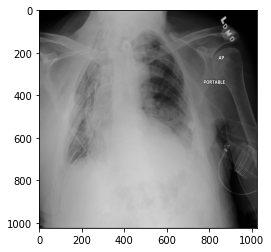

In [16]:
imgC.shape
#imgCG = cv2.cvtColor(imgC, cv2.COLOR_BGR2GRAY)
plt.imshow(imgC, cmap="gray")

In [17]:
#import os
#files = os.listdir('images/')
#k=0
#for f in files:
#  if k < 5 :
#    print(f)
#    imgC = cv2.imread('images/'+f,-1)
#    plt.imshow(imgC, cmap="gray")
#  k += 1

***Resize de imagenes originales***


In [21]:
path = baseDir + 'CXR8/images/images/'
new_path = baseDir + 'CXR8/images/images_resize/'

In [27]:
listImages = os.listdir(path)
type(listImages)
len(listImages)

14999

In [28]:
## test image size 
img_size=256
dirs = [l for l in os.listdir(path) if l != '.DS_Store']
    # total = 0

for item in dirs:
  # Read in all images as grayscale
  img = cv2.imread(path + item, cv2.IMREAD_GRAYSCALE)
  img = cv2.resize(img, (img_size, img_size))
  cv2.imwrite(str(new_path + item), img)
  # total += 1
  # print("Saving: ", item, total)